# 545 M1 Homework

1. Compare word frequencies between two works of a single author.
1. Compare word frequencies between works of two authors.
1. Are there some words preferred by one author but used less frequently by another author?
1. Reflect on the difference between the two authors. What is your interpretation?
1. Include each of the above as markdown cells. Upload a copy of your notebook and a rendering as .html or PDF.

## Run global libraries and functions

In [38]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')#uncomment if not yet downloaded

# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014' ]

# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def get_wf (URL, w_ml):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),w_ml)

    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)

def plotTwoLists(wf_ee, wf_bu, title, wf_ee_title, wf_bu_title):
    sns.set(style="whitegrid")
    f, (ax2, ax1) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

    f.suptitle(title, fontsize=20)
    
    wf_bu_sorted = sorted(wf_bu, key=lambda x: x[1], reverse=True)
    wf_ee_sorted = sorted(wf_ee, key=lambda x: x[1], reverse=True)

    sns.barplot(x=[x[1] for x in wf_bu_sorted], y=[x[0] for x in wf_bu_sorted], ax=ax2)
    ax2.set_title(wf_bu_title)
    ax2.set(ylabel='')

    sns.barplot(x=[x[1] for x in wf_ee_sorted], y=[x[0] for x in wf_ee_sorted], ax=ax1)
    ax1.set_title(wf_ee_title)
    ax2.set_yticklabels([])
    ax1.set_yticklabels([])

    # Adding words inside the bars
    for i, (word, freq) in enumerate(wf_bu_sorted):
        ax2.text(freq, i, f' {word}', va='center', fontsize=10)

    for i, (word, freq) in enumerate(wf_ee_sorted):
        ax1.text(freq, i, f' {word}', va='center', fontsize=10)

    # Remove larger axis labels and grid lines
    ax2.set_xticklabels([])
    ax1.set_xticklabels([])
    ax2.grid(False)
    ax1.grid(False)
    plt.subplots_adjust(wspace=0.5)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/giuseppe.schintu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1. Compare word frequencies between two works of a single author.
Daniel Defoe books from Project Gutenberg:
- The Life and Adventures of Robinson Crusoe by Daniel Defoe at https://www.gutenberg.org/ebooks/521.txt.utf-8
- The Fortunes and Misfortunes of the Famous Moll Flanders by Daniel Defoe at https://www.gutenberg.org/ebooks/370.txt.utf-8

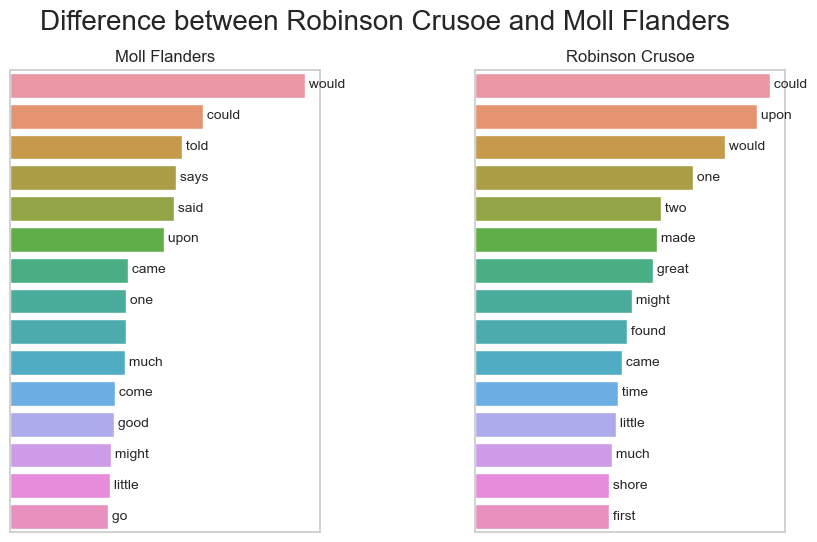

In [39]:
# populate two lists    
(wf_ee, tw_ee) = get_wf('http://www.gutenberg.org/ebooks/521.txt.utf-8',15)
(wf_bu, tw_bu) = get_wf('http://www.gutenberg.org/ebooks/370.txt.utf-8',15)

# Show comparison plot of frequencies
plotTwoLists(wf_ee, wf_bu, 'Difference between Robinson Crusoe and Moll Flanders', 'Robinson Crusoe', 'Moll Flanders')
plt.show()

### 1. Compare word frequencies between works of two authors.
Daniel Defoe and Jules Verne books from Project Gutenberg:
- The Life and Adventures of Robinson Crusoe by Daniel Defoe at https://www.gutenberg.org/ebooks/521.txt.utf-8
- Around the World in Eighty Days by Jules Verne at https://www.gutenberg.org/ebooks/103.txt.utf-8

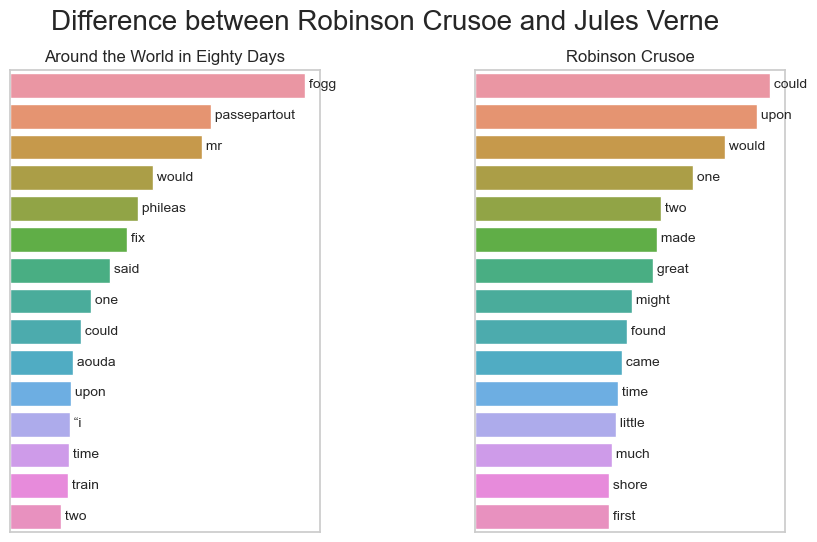

In [40]:
# populate two lists from two different authors    
(wf_ee, tw_ee) = get_wf('http://www.gutenberg.org/ebooks/521.txt.utf-8', 15)
(wf_bu, tw_bu) = get_wf('http://www.gutenberg.org/ebooks/103.txt.utf-8', 15)

# Show comparison plot of frequencies
plotTwoLists(wf_ee, wf_bu, 'Difference between Robinson Crusoe and Jules Verne', 'Robinson Crusoe', 'Around the World in Eighty Days')
plt.show()

### Are there some words preferred by one author but used less frequently by another author?


1. Reflect on the difference between the two authors. What is your interpretation?


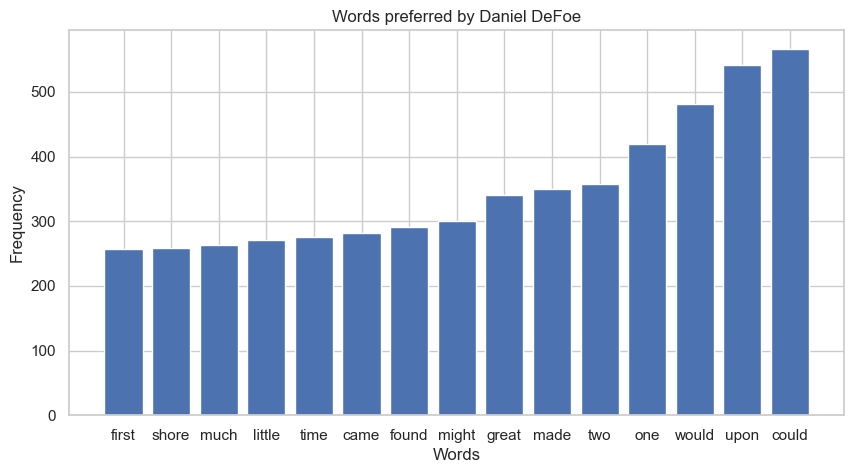

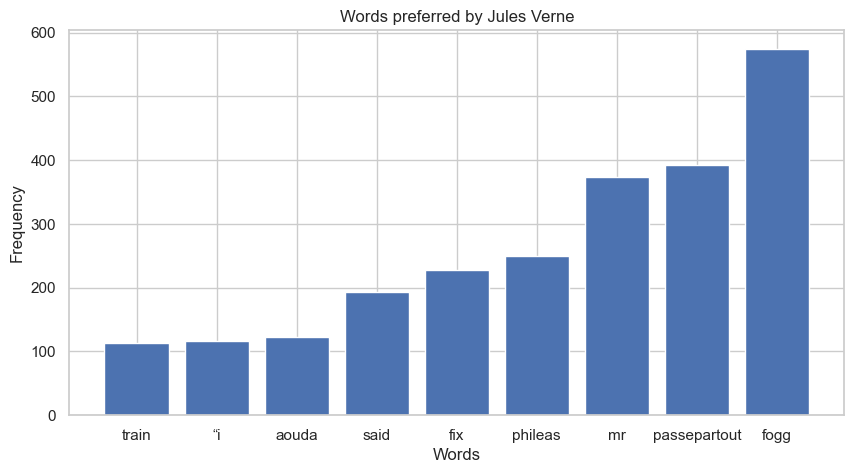

In [41]:
(wf_ee, tw_ee) = get_wf('http://www.gutenberg.org/ebooks/521.txt.utf-8', 15)
(wf_bu, tw_bu) = get_wf('http://www.gutenberg.org/ebooks/103.txt.utf-8', 15)

# Convert lists to dictionaries
wf_ee_dict = dict(wf_ee)
wf_bu_dict = dict(wf_bu)

# Find words preferred by Daniel Dafoe
preferred_by_author1 = {word: wf_ee_dict[word] for word in wf_ee_dict if wf_ee_dict[word] > wf_bu_dict.get(word, 0)}

# Find words preferred by Jules Verne
preferred_by_author2 = {word: wf_bu_dict[word] for word in wf_bu_dict if wf_bu_dict[word] > wf_ee_dict.get(word, 0)}

# Plot for author1
plt.figure(figsize=(10,5))
plt.bar(preferred_by_author1.keys(), preferred_by_author1.values())
plt.title('Words preferred by Daniel DeFoe')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Plot for author2
plt.figure(figsize=(10,5))
plt.bar(preferred_by_author2.keys(), preferred_by_author2.values())
plt.title('Words preferred by Jules Verne')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

### `At first, it seems like Daniel Dafoe used a much more complex and broader vocabulary than Jules Verne.`
### `So, let's remove single letter words and names`

[nltk_data] Downloading package words to
[nltk_data]     /Users/giuseppe.schintu/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     /Users/giuseppe.schintu/nltk_data...
[nltk_data]   Package names is already up-to-date!


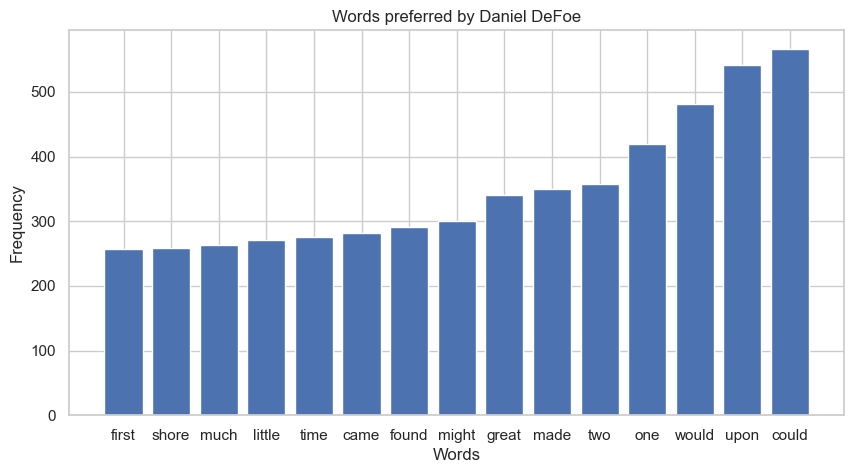

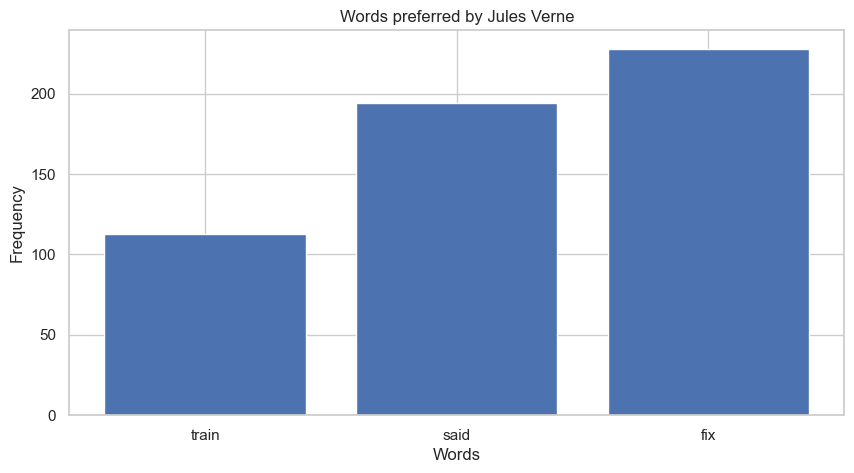

In [42]:
import nltk
from nltk.corpus import words, names

(wf_ee, tw_ee) = get_wf('http://www.gutenberg.org/ebooks/521.txt.utf-8', 15)
(wf_bu, tw_bu) = get_wf('http://www.gutenberg.org/ebooks/103.txt.utf-8', 15)

# Load English words and names
nltk.download(['words', 'names'])
english_words = set(words.words())
names = set(names.words())


# Convert lists to dictionaries
wf_ee_dict = dict(wf_ee)
wf_bu_dict = dict(wf_bu)

# Find words preferred by Daniel Dafoe excluding names and single characters
preferred_by_author1 = {word: wf_ee_dict[word] for word in wf_ee_dict if wf_ee_dict[word] > wf_bu_dict.get(word, 0) and word in english_words and len(word) > 1 and word not in names}

# Find words preferred by Jules Verne excluding names and single characters
preferred_by_author2 = {word: wf_bu_dict[word] for word in wf_bu_dict if wf_bu_dict[word] > wf_ee_dict.get(word, 0) and word in english_words and len(word) > 1 and word not in names}

# Plot for author1
plt.figure(figsize=(10,5))
plt.bar(preferred_by_author1.keys(), preferred_by_author1.values())
plt.title('Words preferred by Daniel DeFoe')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Plot for author2
plt.figure(figsize=(10,5))
plt.bar(preferred_by_author2.keys(), preferred_by_author2.values())
plt.title('Words preferred by Jules Verne')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

### `Also, lets check , in general, how many unique English words did each author use`

In [43]:

(wf_ee, tw_ee) = get_wf('http://www.gutenberg.org/ebooks/521.txt.utf-8', 5000)
(wf_bu, tw_bu) = get_wf('http://www.gutenberg.org/ebooks/103.txt.utf-8', 5000)

# Convert lists to dictionaries
wf_ee_dict = dict(wf_ee)
wf_bu_dict = dict(wf_bu)

# Create sets of English words used by each author
english_words_used_by_author1 = {word for word in wf_ee_dict.keys() if word in english_words and len(word) > 1 and word not in names}
english_words_used_by_author2 = {word for word in wf_bu_dict.keys() if word in english_words and len(word) > 1 and word not in names}

# Print the number of unique English words used by each author
print(f"Daniel DeFoe used {len(english_words_used_by_author1)} unique English words.")
print(f"Jules Verne used {len(english_words_used_by_author2)} unique English words.")

# Find words used by Daniel Dafoe but not used by Jules Verne
unique_to_author1 = {word: wf_ee_dict[word] for word in wf_ee_dict if wf_bu_dict.get(word, 0) == 0 and word in english_words and len(word) > 1 and word not in names}

# Find words used by Jules Verne but not used by Daniel Dafoe
unique_to_author2 = {word: wf_bu_dict[word] for word in wf_bu_dict if wf_ee_dict.get(word, 0) == 0 and word in english_words and len(word) > 1 and word not in names}

print(f"Daniel DeFoe used {len(unique_to_author1)} unique English words that Jules Verne did not use.")

print(f"Jules Verne used {len(unique_to_author2)} unique English words that Daniel DeFoe did not use.")

Daniel DeFoe used 3175 unique English words.
Jules Verne used 2878 unique English words.
Daniel DeFoe used 1567 unique English words that Jules Verne did not use.
Jules Verne used 1270 unique English words that Daniel DeFoe did not use.


### `Based on the number of unique English words used, and the number of unique English words that Jules Verne did not use, I can deduct that Daniel Defoe was more articulated than Jules Verne when comparing Robinson Crusoe and Around the World in Eighty Days.`